In [1]:
import sys
sys.path.insert(1, "../python/architecture")
sys.path.insert(1, "../python/functions")

In [2]:
from data_prep_functions import connect4_prep
from enkf_functions import enkf_classifier
from model_functions import *
from plotting_functions import nn_plot_epoch_acc

In [3]:
X_train, X_test, y_train, y_test = connect4_prep()

In [4]:
X_train = X_train[:1000, :]
X_test = X_test[:150, :]
y_train = y_train[:1000]
y_test = y_test[:150]

In [5]:
import tensorflow
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

model = Sequential()
model.add(Dense(16, "relu", input_shape = (X_train.shape[1],)))
model.add(Dense(3, "softmax"))

model.compile("adam", "categorical_crossentropy", metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 3, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/3
32/32 [==============================] - 0s 7ms/step - loss: 1.0339 - accuracy: 0.4190 - val_loss: 0.8450 - val_accuracy: 0.5000
Epoch 2/3
32/32 [==============================] - 0s 2ms/step - loss: 0.8249 - accuracy: 0.5120 - val_loss: 0.7773 - val_accuracy: 0.5333
Epoch 3/3
32/32 [==============================] - 0s 1ms/step - loss: 0.7749 - accuracy: 0.5410 - val_loss: 0.7444 - val_accuracy: 0.5533


In [6]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

from data_prep_functions import mnist_prep
from plotting_functions import nn_plot_epoch_acc
from enkf_functions import enkf_classifier
from saving_functions import load_objects
from model_functions import nn_load

In [7]:
layers = 2
neurons = [16, 3]

In [8]:
setting_dict = {"particles": 100,
                "epochs": 3,
                "batch_size": 32,    # len(X_train)
                "h_0": 2,
                "delta": 0.005,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

In [9]:
import time
start_time = time.time()

In [10]:
mean_model, mean_model_train_acc, mean_model_test_acc = enkf_classifier(X_train,
                                                                        X_test,
                                                                        y_train,
                                                                        y_test,
                                                                        layers,
                                                                        neurons,
                                                                        setting_dict,
                                                                        save_all = True,
                                                                        file_var = "../objects/connect_4/enkf_connect4_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                        file_model = "../models/connect_4/enkf_connect4_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                        verbose = 0)

In [11]:
end_time = time.time()
print("Calculation time: {} minutes.".format((end_time - start_time) / 60))

Calculation time: 4.636328260103862 minutes.


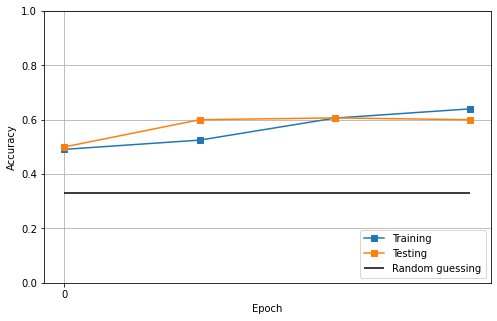

In [12]:
nn_plot_epoch_acc(mean_model_train_acc,
                  mean_model_test_acc,
                  mean_comparison = 0.33,
                  savefig = True,
                  file = "../img/connect_4/enkf_connect4_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))